In [1]:
# lets check some integer numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

given a binary number that is a string of 0's and 1's, find if the number of 1s in this string is even or odd, it is not about the value of binary number in decimal system as that could be odd even when number of 1's in string for example 0011 has two 1s but the value of this binary number is '3' that is a odd number.

In [8]:
#Let's create a uantum circuit to find number of 1's in a given binary string 

N = 5
Num = N + 1  # target qubit that we will measure 

qc_eo = QuantumCircuit(Num+1, 1)

# initialze with value 00111
qc_eo.x(0)
qc_eo.x(1)
qc_eo.x(3)

# we do not know the number
for i in range(Num-1) :
    qc_eo.cx(i, Num)

qc_eo.measure(Num, 0)
qc_eo.draw()

┌───┐                            
q_0: ┤ X ├──■─────────────────────────
     ├───┤  │                         
q_1: ┤ X ├──┼────■────────────────────
     └───┘  │    │                    
q_2: ───────┼────┼────■───────────────
     ┌───┐  │    │    │               
q_3: ┤ X ├──┼────┼────┼────■──────────
     └───┘  │    │    │    │          
q_4: ───────┼────┼────┼────┼────■─────
            │    │    │    │    │     
q_5: ───────┼────┼────┼────┼────┼─────
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_6: ─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤M├
          └───┘└───┘└───┘└───┘└───┘└╥┘
  c: ═══════════════════════════════╩═

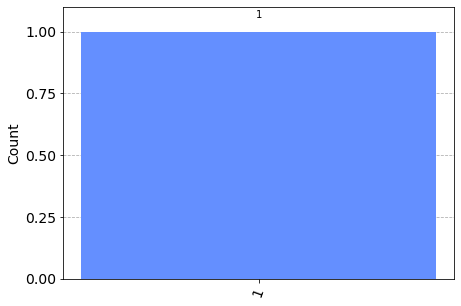

In [9]:
# Run circuit
bkend = Aer.get_backend('qasm_simulator')
shots = 1
job = execute(qc_eo, bkend, shots=shots)
counts = job.result().get_counts(qc_eo)
plot_histogram(counts)

In [10]:
value_eo = max(counts, key=counts.get)
print(value_eo)
if value_eo == "0":
    print("even")
else:
    print("odd")

1
odd


In [5]:
# end of program but begining of new thoughts 

In [6]:
# This is an illustration of a simple quantum algorithm and we can extended it  to 
# findout values in given binary string.  

# The idea is to perform even/odd routine for all given N qubits and then perform same 
# routine for (N-1) LSB qubits. Based on two results, we can the value stored in MSB qubit   

In [7]:
# Extend idea to represent filled /unfilled nodes in graph and possible/desired combinations, 
# we can use grover algorithm further to boost probability of desired outcome  